<a href="https://colab.research.google.com/github/DavoodSZ1993/Dive_into_Deep_Learning/blob/main/12_10_adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l==1.0.0-alpha1.post0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.9 MB/s eta 0:00:00


## 12.10 Adam

### 12.10.2 Implementation

In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

In [4]:
def init_adam_states(feature_dim):
  v_w, v_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
  s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
  return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
  beta1, beta2, eps = 0.9, 0.999, 1e-6
  for p, (v, s) in zip(params, states):
    with torch.no_grad():
      v[:] = beta1 * v + (1 - beta1) * p.grad
      s[:] = beta2 * s + (1 - beta2) * torch.square(p.grad)
      v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
      s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
      p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)
                                                 + eps)
    p.grad.zero_()
  hyperparams['t'] += 1

loss: 0.243, 0.022 sec/epoch


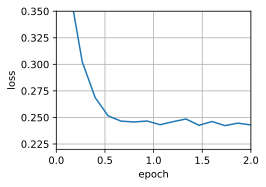

In [6]:
from torch.nn import init
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adam, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim);

loss: 0.243, 0.026 sec/epoch


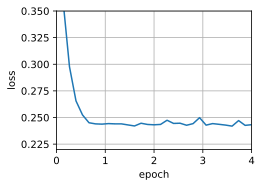

In [7]:
trainer = torch.optim.Adam
d2l.train_concise_ch11(trainer, {'lr': 0.01}, data_iter)

### 12.10.3 Yogi

In [10]:
def yogi(params, states, hyperparams):
  beta1, beta2, eps = 0.9, 0.999, 1e-3
  for p, (v, s) in zip(params, states):
    with torch.no_grad():
      v[:] = beta1 * v + (1 - beta1) * p.grad
      s[:] = s + (1 - beta2) * torch.sign(torch.square(p.grad) - s) * torch.square(p.grad)
      v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
      s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
      p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr) + eps)
    p.grad.data.zero_()
  hyperparams['t'] += 1

loss: 0.242, 0.023 sec/epoch


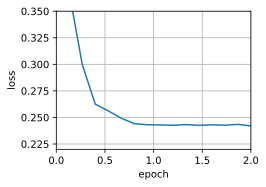

In [11]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(yogi, init_adam_states(feature_dim), 
               {'lr': 0.01, 't': 1}, data_iter, feature_dim);